# Flow from directory test #
After segmenting the line images into chunks and putting those in the correct directory structure for the Keras' flow_from_directory function, and want to test how we can use this function not only in the neural network compiling and running, but also in a loop so that we have access to the actual image files that are being flowed from the directory.

Documentation for handling the keras flow from directory function can be found in \[1\].

## References ##
\[1\] https://keras.io/api/preprocessing/image/

In [12]:
from tensorflow import keras

In [13]:
PATH = "/home/mother/git/augmented-cnn-writer-identification/datasets/chunks"
generator = keras.preprocessing.image.ImageDataGenerator()
dataset = generator.flow_from_directory(
    directory=PATH,
    target_size=(50, 50),
    seed=32,
    batch_size=5,
    color_mode="grayscale"
)

Found 191130 images belonging to 505 classes.


In [14]:
len(dataset)

38226

## Flow_from_directory result ##
According to the documentation the iterator returns a (x, y) tuple. What this then means is that it'll return an array for the batch_size of (images, labels). The labels also seem to be one-hot encoded already.

        dataset[batch_number][{0: images, 1: labels}][index]

In [15]:
print(dataset[0][0][0])

[[[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 ...

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]]


In [16]:
dataset.class_indices

{'000': 0,
 '000a': 1,
 '000b': 2,
 '000c': 3,
 '000d': 4,
 '000e': 5,
 '000f': 6,
 '000u': 7,
 '000x': 8,
 '002': 9,
 '003': 10,
 '003a': 11,
 '003b': 12,
 '003c': 13,
 '003d': 14,
 '003e': 15,
 '003f': 16,
 '003u': 17,
 '003x': 18,
 '004': 19,
 '005': 20,
 '006': 21,
 '007': 22,
 '007a': 23,
 '007b': 24,
 '007c': 25,
 '007d': 26,
 '007e': 27,
 '007f': 28,
 '007u': 29,
 '007x': 30,
 '008': 31,
 '009': 32,
 '010': 33,
 '010b': 34,
 '011': 35,
 '011a': 36,
 '011b': 37,
 '011c': 38,
 '011e': 39,
 '011f': 40,
 '011g': 41,
 '011h': 42,
 '011i': 43,
 '011j': 44,
 '011k': 45,
 '011l': 46,
 '011m': 47,
 '011n': 48,
 '011o': 49,
 '011p': 50,
 '011r': 51,
 '011u': 52,
 '011x': 53,
 '012': 54,
 '013': 55,
 '014': 56,
 '014b': 57,
 '014u': 58,
 '014x': 59,
 '015': 60,
 '016': 61,
 '016a': 62,
 '016b': 63,
 '016c': 64,
 '016d': 65,
 '016e': 66,
 '017': 67,
 '018': 68,
 '018a': 69,
 '018b': 70,
 '018c': 71,
 '018d': 72,
 '018e': 73,
 '018f': 74,
 '018g': 75,
 '018h': 76,
 '018i': 77,
 '018j': 78,
 

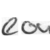

In [17]:
from PIL import Image
import numpy as np

array = dataset[0][0][2].flatten().reshape((50,50))

image = Image.fromarray(array)

image.show()



In [18]:
from PIL import Image
import numpy as np

def flow_to_image(batch_items):
    images = [] # Not needed if you are going to yield.
    
    for item in batch_items[0]:
        array = item.flatten().reshape((50,50))
        image = Image.fromarray(array)
        yield({
            "image": image,
            "array": array,
        })

for image in flow_to_image(dataset[0]):
    print(StandaloneMoment(image["array"]))

NameError: name 'StandaloneMoment' is not defined

In [ ]:
import numpy as np

MAX_PIXEL_VALUE = 255

def StandaloneMoment( image ):
    height, width = image.shape

    y_sums = np.zeros(width)
    y_counts = np.zeros(width)

    x_averages = []

    # Up-Down
    for y in range(height):

        x_sum = x_count = 0

        # Left-Right
        for x in range(width):
            value = image[y][x]
            if (value < 200):

                y_counts[x] += 1
                x_count += 1

                additions = {
                    "x_sum": (value/MAX_PIXEL_VALUE) * x,
                    "y_sums": (value/MAX_PIXEL_VALUE) * y
                }

                print(additions)

                x_sum += additions["x_sum"]
                y_sums[x] += additions["y_sums"]

        if x_count != 0:
            x_averages.append(x_sum / x_count)
        else:
            x_averages.append(0)

    y_averages = np.zeros(width)
    for i in range(len(y_sums)):
        if (y_counts[i] == 0):
            y_averages[i] = 0
        else:
            y_averages[i] = y_sums[i] / y_counts[i]

    mid_x = width/2
    mid_y = height/2

    values = {
         "x": {
            "sum": sum(x_averages),
            "length": len(x_averages),
            "average": sum(x_averages)/len(x_averages),
            "mid": mid_x,
            "value": abs(sum(y_averages)/len(y_averages) - mid_y)/mid_y,
        },
        "y": {
            "sum": sum(y_averages),
            "length": len(y_averages),
            "average": sum(y_averages)/len(y_averages),
            "mid": mid_y,
            "value": abs(sum(y_averages)/len(y_averages) - mid_y)/mid_y,
        }
    }

    print({
        "values": values,
        "image": image.shape,
    })

    return [
        values["y"]["value"],
        values["x"]["value"]
    ]

In [23]:
import numpy as np

MAX_PIXEL_VALUE = 255
THRESHOLD = 100

def ImageMoment( image ):
    height, width = image.shape

    moment_sums = {
        "00": 0,
        "01": 0,
        "10": 0,
        "11": 0,
    }

    x_averages = []

    # Up-Down
    for y in range(height):
        # Left-Right
        for x in range(width):
            value = image[y][x]
            if (value < THRESHOLD):
                moment_sums["00"] += value
                moment_sums["01"] += y * value
                moment_sums["10"] += x * value
                moment_sums["11"] += y * x * value

    # Normalize the coordinates in relation to the center of the image.
    moment = []
    moment.append(moment_sums["01"] / moment_sums["00"] / (height / 2))
    moment.append(moment_sums["10"] / moment_sums["00"] / (width / 2))

    return moment


In [24]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

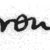

[0.9291047805697487, 0.8910030097291244]
[0.9291047805697487, 0.8910030097291244]


In [25]:
from features.image_moment import image_moment

image = [image for image in flow_to_image(dataset[0])][1]
image["image"].show()

print(ImageMoment(image["array"]))
print(image_moment(image["array"]))